<a href="https://colab.research.google.com/github/kimlien255/AI-emotion-recognition/blob/main/Facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import csv

dataset_dir = '/content/drive/MyDrive/AI/data_new/emotiondata'

# Create the CSV file
csv_file = 'emotion_dataset_2.csv'

with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'emotion_label'])  # Write header row

    # Traverse the dataset directory
    for emotion_label, label_name in enumerate(os.listdir(dataset_dir)):
        label_dir = os.path.join(dataset_dir, label_name)
        if not os.path.isdir(label_dir):
            continue

        # Iterate through images in the label directory
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)

            # Write the image path and corresponding emotion label to the CSV file
            writer.writerow([file_path, emotion_label])

print('CSV file created successfully.')

CSV file created successfully.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam

# Input CSV file with image file paths and corresponding emotion labels
data = pd.read_csv('/content/emotion_dataset_2.csv')

# Load and preprocess the images
images = []
labels = []

for index, row in data.iterrows():
    image = load_img(row['image_path'], target_size=(48, 48))
    image = img_to_array(image)
    image = image / 255.0  # Normalize the image pixels between 0 and 1
    images.append(image)
    labels.append(row['emotion_label'])



In [5]:
# Convert the lists to NumPy arrays
images = np.array(images, dtype='float32')
labels = np.array(labels)

In [6]:
# Perform one-hot encoding on the labels
labels = to_categorical(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [8]:
# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
59/59 [==============================] - 9s 23ms/step - loss: 1.7919 - accuracy: 0.1907 - val_loss: 1.7831 - val_accuracy: 0.1927
Epoch 2/100
59/59 [==============================] - 1s 11ms/step - loss: 1.7803 - accuracy: 0.1955 - val_loss: 1.7798 - val_accuracy: 0.1927
Epoch 3/100
59/59 [==============================] - 1s 11ms/step - loss: 1.7777 - accuracy: 0.2175 - val_loss: 1.7669 - val_accuracy: 0.2313
Epoch 4/100
59/59 [==============================] - 1s 11ms/step - loss: 1.7625 - accuracy: 0.2453 - val_loss: 1.7462 - val_accuracy: 0.3233
Epoch 5/100
59/59 [==============================] - 1s 11ms/step - loss: 1.7102 - accuracy: 0.2833 - val_loss: 1.6742 - val_accuracy: 0.3105
Epoch 6/100
59/59 [==============================] - 1s 11ms/step - loss: 1.6063 - accuracy: 0.3423 - val_loss: 1.5470 - val_accuracy: 0.4218
Epoch 7/100
59/59 [==============================] - 1s 11ms/step - loss: 1.5190 - accuracy: 0.4001 - val_loss: 1.4882 - val_accuracy: 0.4411
Epoch 

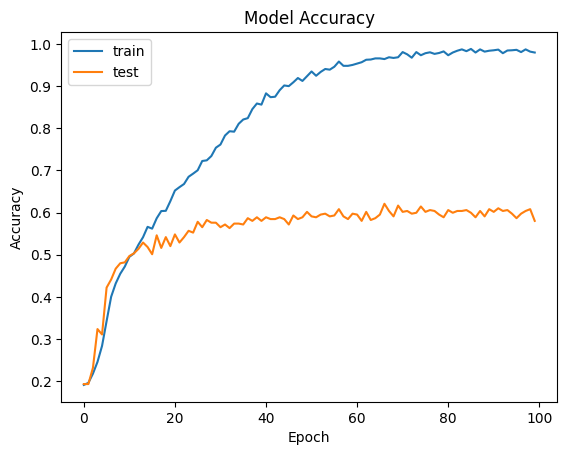

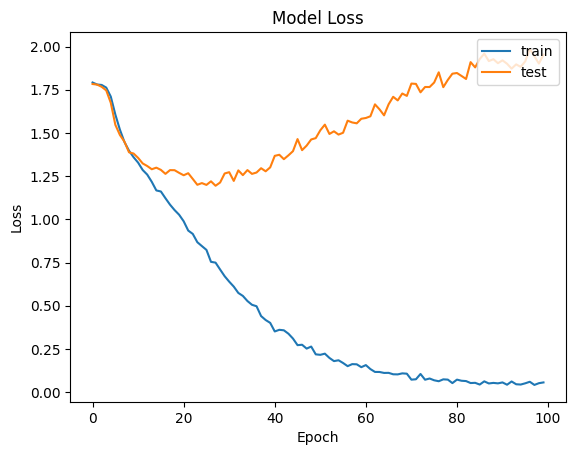

In [10]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


15/15 [==============================] - 0s 3ms/step


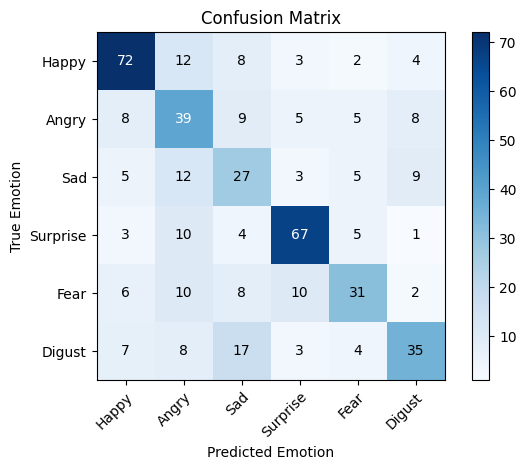

In [11]:
# Save model structure in JSON file
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)
# Save the model
model.save('emotion_recognition_model.h5')

# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Define the labels for your emotion classes
emotion_labels = ['Happy', 'Angry', 'Sad', 'Surprise', 'Fear', 'Digust']

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Customize the plot
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=emotion_labels, yticklabels=emotion_labels,
       xlabel='Predicted Emotion',
       ylabel='True Emotion',
       title='Confusion Matrix')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over the data and annotate the plot with the confusion matrix values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2.0 else "black")

# Show the plot
plt.tight_layout()
plt.show()